In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import itertools

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier

In [2]:
df = pd.read_csv("jobs.csv")

In [3]:
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,t,y,e
0,-0.614282,1.464727,0.0,0.0,1.0,0.0,2.393250,2.746196,-0.653311,-0.656913,1.627531,2.462337,2.937244,0.0,0.0,2.843909,0.0,0.0,1.0,0.0
1,-0.802463,0.101835,0.0,0.0,1.0,0.0,0.109885,0.498271,-0.785284,-0.743407,-0.022502,-0.177193,0.082537,0.0,0.0,0.038422,0.0,0.0,1.0,0.0
2,-0.896553,-0.238888,1.0,0.0,1.0,1.0,-0.085212,-0.148097,-0.847312,-0.781606,-0.361348,-0.286221,-0.303615,0.0,0.0,-0.191304,0.0,0.0,1.0,0.0
3,-0.896553,-0.238888,0.0,0.0,0.0,1.0,0.405581,0.325594,-0.847312,-0.781606,-0.361348,0.023020,-0.039630,0.0,0.0,0.173108,0.0,0.0,1.0,1.0
4,0.138440,-1.601779,1.0,0.0,1.0,1.0,-0.722531,-0.212734,-0.019840,-0.156019,-1.422084,-0.514563,-0.331552,0.0,0.0,-0.779227,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3207,1.737976,1.805449,0.0,0.0,1.0,0.0,4.235839,-1.110467,1.887171,1.995900,2.113702,6.424008,-0.518815,0.0,1.0,5.197260,0.0,0.0,0.0,0.0
3208,-0.520192,0.101835,0.0,0.0,0.0,0.0,0.239950,0.289997,-0.583365,-0.608340,-0.022502,-0.094318,-0.063091,0.0,0.0,0.143774,0.0,0.0,1.0,0.0
3209,-0.802463,0.442558,1.0,0.0,0.0,0.0,0.124337,0.692182,-0.785284,-0.743407,0.345809,-0.168387,0.236242,0.0,0.0,0.135970,0.0,0.0,1.0,0.0
3210,0.702982,0.101835,0.0,0.0,1.0,0.0,0.341112,0.670636,0.566120,0.413295,-0.022502,-0.024223,0.218301,0.0,0.0,0.225715,0.0,0.0,1.0,0.0


In [4]:
df.columns

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 't', 'y', 'e'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3212 entries, 0 to 3211
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      3212 non-null   float64
 1   x2      3212 non-null   float64
 2   x3      3212 non-null   float64
 3   x4      3212 non-null   float64
 4   x5      3212 non-null   float64
 5   x6      3212 non-null   float64
 6   x7      3212 non-null   float64
 7   x8      3212 non-null   float64
 8   x9      3212 non-null   float64
 9   x10     3212 non-null   float64
 10  x11     3212 non-null   float64
 11  x12     3212 non-null   float64
 12  x13     3212 non-null   float64
 13  x14     3212 non-null   float64
 14  x15     3212 non-null   float64
 15  x16     3212 non-null   float64
 16  x17     3212 non-null   float64
 17  t       3212 non-null   float64
 18  y       3212 non-null   float64
 19  e       3212 non-null   float64
dtypes: float64(20)
memory usage: 502.0 KB


In [6]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,t,y,e
count,3.212000e+03,3.212000e+03,3212.000000,3212.000000,3212.000000,3212.000000,3.212000e+03,3.212000e+03,3.212000e+03,3.212000e+03,3.212000e+03,3.212000e+03,3.212000e+03,3212.000000,3212.000000,3.212000e+03,3212.000000,3212.000000,3212.000000,3212.000000
mean,2.382901e-16,-3.820971e-16,0.374222,0.048879,0.707970,0.411893,-1.200783e-16,4.956600e-17,-6.083414e-18,1.757408e-14,-2.638422e-16,-1.168292e-17,9.429291e-17,0.168742,0.167497,1.901758e-16,0.010897,0.092466,0.849938,0.224782
std,1.000000e+00,1.000000e+00,0.483997,0.215649,0.454767,0.492253,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.374582,0.373477,1.000000e+00,0.103833,0.289727,0.357188,0.417504
min,-1.461095e+00,-3.986840e+00,0.000000,0.000000,0.000000,0.000000,-1.147411e+00,-1.110467e+00,-1.164047e+00,-9.488316e-01,-2.143974e+00,-5.580568e-01,-5.188151e-01,0.000000,0.000000,-9.799811e-01,0.000000,0.000000,0.000000,0.000000
25%,-8.024627e-01,-5.796108e-01,0.000000,0.000000,0.000000,0.000000,-8.923385e-01,-9.139141e-01,-7.852843e-01,-7.434072e-01,-6.707297e-01,-5.423814e-01,-5.098380e-01,0.000000,0.000000,-8.142367e-01,0.000000,0.000000,1.000000,0.000000
50%,-3.320111e-01,1.018350e-01,0.000000,0.000000,1.000000,0.000000,-8.521244e-02,-8.346011e-02,-4.355556e-01,-4.998533e-01,-2.250229e-02,-2.862214e-01,-2.737369e-01,0.000000,0.000000,-2.035020e-01,0.000000,0.000000,1.000000,0.000000
75%,7.970728e-01,4.425579e-01,1.000000,0.000000,1.000000,1.000000,5.506613e-01,5.629081e-01,6.730184e-01,5.267384e-01,3.458087e-01,1.366588e-01,1.318304e-01,0.000000,0.000000,4.539777e-01,0.000000,0.000000,1.000000,0.000000
max,2.114337e+00,1.805449e+00,1.000000,1.000000,1.000000,1.000000,8.751987e+00,1.016507e+01,2.446737e+00,2.773336e+00,2.113702e+00,2.305284e+01,2.902264e+01,1.000000,1.000000,7.136030e+00,1.000000,1.000000,1.000000,1.000000


In [7]:
df.isnull()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,t,y,e
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3210,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum().sum()

0

In [9]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,t,y,e
0,-0.614282,1.464727,0.0,0.0,1.0,0.0,2.393250,2.746196,-0.653311,-0.656913,1.627531,2.462337,2.937244,0.0,0.0,2.843909,0.0,0.0,1.0,0.0
1,-0.802463,0.101835,0.0,0.0,1.0,0.0,0.109885,0.498271,-0.785284,-0.743407,-0.022502,-0.177193,0.082537,0.0,0.0,0.038422,0.0,0.0,1.0,0.0
2,-0.896553,-0.238888,1.0,0.0,1.0,1.0,-0.085212,-0.148097,-0.847312,-0.781606,-0.361348,-0.286221,-0.303615,0.0,0.0,-0.191304,0.0,0.0,1.0,0.0
3,-0.896553,-0.238888,0.0,0.0,0.0,1.0,0.405581,0.325594,-0.847312,-0.781606,-0.361348,0.023020,-0.039630,0.0,0.0,0.173108,0.0,0.0,1.0,1.0
4,0.138440,-1.601779,1.0,0.0,1.0,1.0,-0.722531,-0.212734,-0.019840,-0.156019,-1.422084,-0.514563,-0.331552,0.0,0.0,-0.779227,0.0,0.0,1.0,0.0


In [10]:
df['y'].value_counts()

1.0    2730
0.0     482
Name: y, dtype: int64

In [11]:
from econml.metalearners import XLearner
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [12]:
X = df.iloc[:,:-3]
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17
0,-0.614282,1.464727,0.0,0.0,1.0,0.0,2.393250,2.746196,-0.653311,-0.656913,1.627531,2.462337,2.937244,0.0,0.0,2.843909,0.0
1,-0.802463,0.101835,0.0,0.0,1.0,0.0,0.109885,0.498271,-0.785284,-0.743407,-0.022502,-0.177193,0.082537,0.0,0.0,0.038422,0.0
2,-0.896553,-0.238888,1.0,0.0,1.0,1.0,-0.085212,-0.148097,-0.847312,-0.781606,-0.361348,-0.286221,-0.303615,0.0,0.0,-0.191304,0.0
3,-0.896553,-0.238888,0.0,0.0,0.0,1.0,0.405581,0.325594,-0.847312,-0.781606,-0.361348,0.023020,-0.039630,0.0,0.0,0.173108,0.0
4,0.138440,-1.601779,1.0,0.0,1.0,1.0,-0.722531,-0.212734,-0.019840,-0.156019,-1.422084,-0.514563,-0.331552,0.0,0.0,-0.779227,0.0


In [13]:
T = df.iloc[:,-3].values

In [14]:
type(T)

numpy.ndarray

In [15]:
T = np.reshape(T,(-1, 1))

In [16]:
T.shape


The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The MathtextBackendBitmap class was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.


In [17]:
X.shape

In [18]:
Y = df.iloc[:,-2]

In [19]:
Y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
3207    0.0
3208    1.0
3209    1.0
3210    1.0
3211    1.0
Name: y, Length: 3212, dtype: float64

In [20]:
Y.shape

In [21]:
e = df.iloc[:,-1]

In [22]:
e

0       0.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
3207    0.0
3208    0.0
3209    0.0
3210    0.0
3211    0.0
Name: e, Length: 3212, dtype: float64

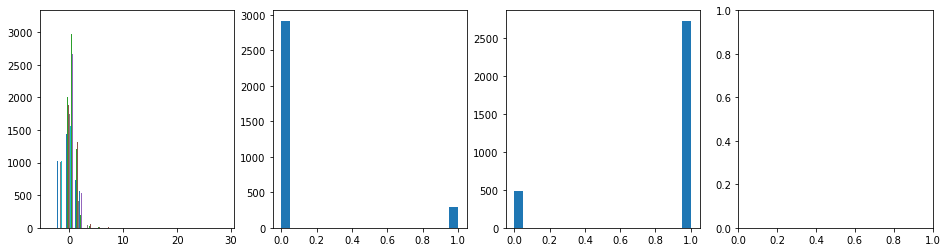

In [23]:
bins = 20
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
axs[0].hist(X, bins=bins)
axs[1].hist(T, bins=bins)
axs[2].hist(Y, bins=bins)
plt.show()

In [100]:
x_train,x_test,t_train,t_test,y_train,y_test,e_train,e_test = train_test_split(X,T,Y,e, test_size=0.2,random_state = 50)

# Random forrest

In [25]:
clf = RandomForestRegressor()

In [26]:
x_train.shape

In [27]:
t_train.shape

In [28]:
xt_train= np.concatenate([x_train,t_train], axis=1)

In [29]:
clf.fit(xt_train,y_train)

RandomForestRegressor()

In [30]:
xt0_test = np.concatenate([x_test, np.zeros_like(t_test)], axis=1)

In [31]:
rf_y0_test = clf.predict(xt0_test)

In [32]:
xt1_test = np.concatenate([x_test, np.ones_like(t_test)], axis=1)

In [33]:
rf_y1_test = clf.predict(xt1_test)

In [34]:
rf_y1_test.shape


The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The MathtextBackendBitmap class was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.


In [35]:
random_forest_ite = rf_y1_test - rf_y0_test

In [36]:
random_forest_ite.shape

## T learner

In [37]:
#T-Learner
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
m0 = LinearRegression()
m1 = LinearRegression()
t0_idx = (t_train == 0).flatten()
t1_idx = (t_train == 1).flatten()
# train on control units
m0.fit(x_train[t0_idx], y_train[t0_idx])
# train on treated units
m1.fit(x_train[t1_idx], y_train[t1_idx])
y0_pred = m0.predict(x_test)
y1_pred = m1.predict(x_test)
effect_pred = y1_pred - y0_pred

## X-Learner

In [38]:
# X-Learner
xl = XLearner(models=RandomForestRegressor(), propensity_model=RandomForestClassifier())
xl.fit(y_train, t_train.flatten(), X=x_train)

xl_ite_test = xl.effect(x_test)

# Metrics

### the metric that will be use on this dataset is average treatment effect on the treated because the counterfactual was not observed

## Propensity score

In [39]:
x = X.values

In [40]:
y = Y.values

In [41]:
from causalinference import CausalModel

In [42]:
model = CausalModel(y,T,x)

In [43]:
model.est_via_matching(bias_adj = True)

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [44]:
print(model.estimates)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.117      0.130     -0.905      0.365     -0.371      0.137
           ATC     -0.134      0.141     -0.951      0.341     -0.411      0.142
           ATT      0.049      0.100      0.490      0.624     -0.147      0.245



In [45]:
model.estimates

{'matching': {'atc': -0.13423239075681379, 'att': 0.0490438006985863, 'ate': -0.11728561962908843, 'atc_se': 0.14108022485827537, 'att_se': 0.10018049705889837, 'ate_se': 0.1295687147734872}}

In [46]:
model.estimates['matching']

{'atc': -0.13423239075681379, 'att': 0.0490438006985863, 'ate': -0.11728561962908843, 'atc_se': 0.14108022485827537, 'att_se': 0.10018049705889837, 'ate_se': 0.1295687147734872}

In [47]:
ATT = model.estimates['matching']['att']

In [48]:
ATT


The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The MathtextBackendBitmap class was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.


In [49]:
ATC = model.estimates['matching']['atc']

In [50]:
ATC

In [118]:
def abs_att(effect_pred, yf, t, e):
    """
    Absolute error for the Average Treatment Effect on the Treated
    :param effect_pred: predicted treatment effect value
    :param yf: factual (observed) outcome
    :param t: treatment status (treated/control)
    :param e: whether belongs to the experimental group
    :return: absolute error on ATT
    """
    att_true = np.mean(yf[t > 0]) - np.mean(yf[(1 - t + e) > 1])
    att_pred = np.mean(effect_pred[(t + e) > 1])

    return np.abs(att_pred - att_true)

In [119]:
ATT_RF = abs_att(random_forest_ite,y_test,t_test,e_test)

In [120]:
ATT_RF

In [121]:
ATT_TL = abs_att(effect_pred,y_test,t_test,e_test)

In [122]:
ATT_TL

In [123]:
ATT_XL = abs_att(xl_ite_test,y_test,t_test,e_test)

In [124]:
ATT_XL

In [125]:
def policy_risk(effect_pred, yf, t, e):
    """
    Computes the risk of the policy defined by predicted effect
    :param effect_pred: predicted treatment effect value
    :param yf: factual (observed) outcome
    :param t: treatment status (treated/control)
    :param e: whether belongs to the experimental group
    :return: policy risk
    """
    # Consider only the cases for which we have experimental data (i.e., e > 0)
    t_e = t[e > 0]
    yf_e = yf[e > 0]
    effect_pred_e = effect_pred[e > 0]

    if np.any(np.isnan(effect_pred_e)):
        return np.nan

    policy = effect_pred_e > 0.0
    treat_overlap = (policy == t_e) * (t_e > 0)
    control_overlap = (policy == t_e) * (t_e < 1)

    if np.sum(treat_overlap) == 0:
        treat_value = 0
    else:
        treat_value = np.mean(yf_e[treat_overlap])

    if np.sum(control_overlap) == 0:
        control_value = 0
    else:
        control_value = np.mean(yf_e[control_overlap])

    pit = np.mean(policy)
    policy_value = pit * treat_value + (1.0 - pit) * control_value

    return 1.0 - policy_value

In [126]:
P_RF = policy_risk(random_forest_ite,y_test,t_test,e_test)

In [127]:
P_RF

In [128]:
P_TL = policy_risk(effect_pred,y_test,t_test,e_test)

In [129]:
P_TL

In [130]:
P_XL = policy_risk(xl_ite_test,y_test,t_test,e_test)

In [131]:
P_XL

# Hyperparameter optimisation

In [51]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import precision_score as precision
from sklearn.metrics import recall_score as recall
from sklearn.metrics import f1_score as f1
from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import  cross_val_score

In [52]:
clf = RandomForestRegressor()

In [53]:
scoring_list = ['neg_mean_squared_error', 'r2']

In [54]:
def get_best_params(scoring):
    clf = RandomForestRegressor()
    param_grid = { 
    'n_estimators': [100, 500, 1000],
    'max_depth' : [2,8,10]
    }
    clf = GridSearchCV(clf, param_grid, n_jobs = -1, cv = 10, scoring = scoring)
    clf.fit(xt_train, y_train)
    return clf.best_params_

In [55]:
print(get_best_params('neg_mean_squared_error'))

{'max_depth': 8, 'n_estimators': 1000}


In [56]:
print(get_best_params('r2'))

{'max_depth': 8, 'n_estimators': 100}


In [57]:
clf = RandomForestRegressor(n_estimators=500, max_depth=8)

In [58]:
scoring_list = ['neg_mean_squared_error', 'r2']

In [59]:
scores = cross_validate(clf, x_train, y_train, cv=10, scoring = scoring_list)

In [60]:
print("MSE: %.8f +/- %.8f" % (scores['test_neg_mean_squared_error'].mean(), scores['test_neg_mean_squared_error'].std()))
print("R2: %.8f +/- %.8f" % (scores['test_r2'].mean(), scores['test_r2'].std()))

MSE: -0.09726744 +/- 0.01706539
R2: 0.24457777 +/- 0.07423843


In [132]:
results = []
results.append(['RF', ATT_RF, P_RF])
results.append(['TL', ATT_TL, P_TL])
results.append(['XL', ATT_XL, P_XL])

cols = ['Method', 'ATT test', 'Policy_risk test']

df = pd.DataFrame(results, columns=cols)
df

,Method,ATT test,Policy_risk test
0,RF,0.021694,0.237230
1,TL,0.009336,0.251769
2,XL,0.020566,0.205818


## Propensity score re-weighting

In [61]:
def get_ps_weights(clf, x, t):
    
    ti = np.squeeze(t)
    clf.fit(x, ti)
    ptx = clf.predict_proba(x).T[1].T + 0.0002 # add a small value to avoid dividing by 0  
    wi = (ti/ptx)+((1-ti)/(1-ptx))
    return wi

In [62]:
# Get the sample weights
prop_clf = RandomForestClassifier()
weights = get_ps_weights(prop_clf, x_train, t_train)

# Train the regressor
rf_ipsw = RandomForestRegressor()

rf_ipsw.fit(xt_train, y_train, sample_weight=weights)

# Make predictions
rf_ipsw_y0_test = rf_ipsw.predict(xt0_test)

rf_ipsw_y1_test = rf_ipsw.predict(xt1_test)


# Compute ITEs
rf_ipsw_te_test = rf_ipsw_y1_test - rf_ipsw_y0_test

In [134]:
ATT_IPSW = abs_att(rf_ipsw_te_test,y_test,t_test,e_test)

In [135]:
ATT_IPSW

In [137]:
P_IPSW = policy_risk(rf_ipsw_te_test,y_test,t_test,e_test)

In [138]:
P_IPSW

In [139]:
clf = RandomForestRegressor()

In [140]:
scoring_list = ['neg_mean_squared_error', 'r2']

In [141]:
def get_best_parameter(scoring):
    clf = RandomForestRegressor()
    param_grid = { 
    'n_estimators': [100, 500, 1000],
    'max_depth' : [2,8,10]
    }
    clf = GridSearchCV(clf, param_grid, n_jobs = -1, cv = 10, scoring = scoring)
    clf.fit(xt_train, y_train, sample_weight=weights)
    return clf.best_params_

In [142]:
print(get_best_parameter('neg_mean_squared_error'))

{'max_depth': 8, 'n_estimators': 500}


In [143]:
print(get_best_parameter('r2'))

{'max_depth': 8, 'n_estimators': 1000}


In [144]:
clf = RandomForestRegressor(n_estimators=1000, max_depth=8)

In [145]:
scoring_list = ['neg_mean_squared_error', 'r2']

In [146]:
scores = cross_validate(clf, x_train, y_train, cv=10, scoring = scoring_list)

In [147]:
print("MSE: %.8f +/- %.8f" % (scores['test_neg_mean_squared_error'].mean(), scores['test_neg_mean_squared_error'].std()))
print("R2: %.8f +/- %.8f" % (scores['test_r2'].mean(), scores['test_r2'].std()))

MSE: -0.09774861 +/- 0.01715228
R2: 0.24063054 +/- 0.07637956


In [148]:
results = []
results.append(['RF', ATT_RF, P_RF])
results.append(['TL', ATT_TL, P_TL])
results.append(['XL', ATT_XL, P_XL])
results.append(['IPSW', ATT_IPSW, P_IPSW])

cols = ['Method', 'ATT test', 'Policy_risk test']

df = pd.DataFrame(results, columns=cols)
df

,Method,ATT test,Policy_risk test
0,RF,0.021694,0.237230
1,TL,0.009336,0.229164
2,XL,0.020566,0.205818
3,IPSW,0.024449,0.229164
